In [6]:
import numpy as np
import torch.nn as nn
from kaggle_utils.loader_utils import preprocess_data
from kaggle_utils.training_utils import split_and_train, predict_test_data
from kaggle_utils.plot_utils import plot_losses
from kaggle_utils.models.multi_class.MultiClassNN import MultiClassNN
from kaggle_utils.models.model_utils import get_model_summary

TRAINING_CSV_PATH = "train.csv"
TESTING_CSV_PATH = "test.csv"
FEATURE_CONFIG_PATH = "feature_config.json"
LABEL_COLUMN = 'Survived'
ID_COLUMN = 'PassengerId'
EXCLUDED_FIELDS = ["Name", "Ticket", "Cabin"]
NUM_EPOCHS = 200

In [7]:
training_df = preprocess_data(TRAINING_CSV_PATH,
                              FEATURE_CONFIG_PATH,
                              EXCLUDED_FIELDS)
X = training_df.drop(LABEL_COLUMN, axis=1).astype(np.float32)
y = training_df[LABEL_COLUMN].astype(np.float32).squeeze()
X

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,22.0,1.0,0.0,7.250000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,38.0,1.0,0.0,71.283302,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.925000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4.0,35.0,1.0,0.0,53.099998,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5.0,35.0,0.0,0.0,8.050000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,27.0,0.0,0.0,13.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888.0,19.0,0.0,0.0,30.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,889.0,28.0,1.0,2.0,23.450001,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,890.0,26.0,0.0,0.0,30.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Epoch [10/200], 	             Training Loss: 0.6831, 	             Validation Loss: 0.6725
Epoch [20/200], 	             Training Loss: 0.6791, 	             Validation Loss: 0.6569
Epoch [30/200], 	             Training Loss: 0.6793, 	             Validation Loss: 0.6473
Epoch [40/200], 	             Training Loss: 0.6809, 	             Validation Loss: 0.6432
Epoch [50/200], 	             Training Loss: 0.6755, 	             Validation Loss: 0.6367
Epoch [60/200], 	             Training Loss: 0.6722, 	             Validation Loss: 0.6325
Epoch [70/200], 	             Training Loss: 0.6718, 	             Validation Loss: 0.6293
Epoch [80/200], 	             Training Loss: 0.6686, 	             Validation Loss: 0.6235
Epoch [90/200], 	             Training Loss: 0.6641, 	             Validation Loss: 0.6228
Epoch [100/200], 	             Training Loss: 0.6620, 	             Validation Loss: 0.6282
Epoch [110/200], 	             Training Loss: 0.6575, 	             Validation Loss: 0.62

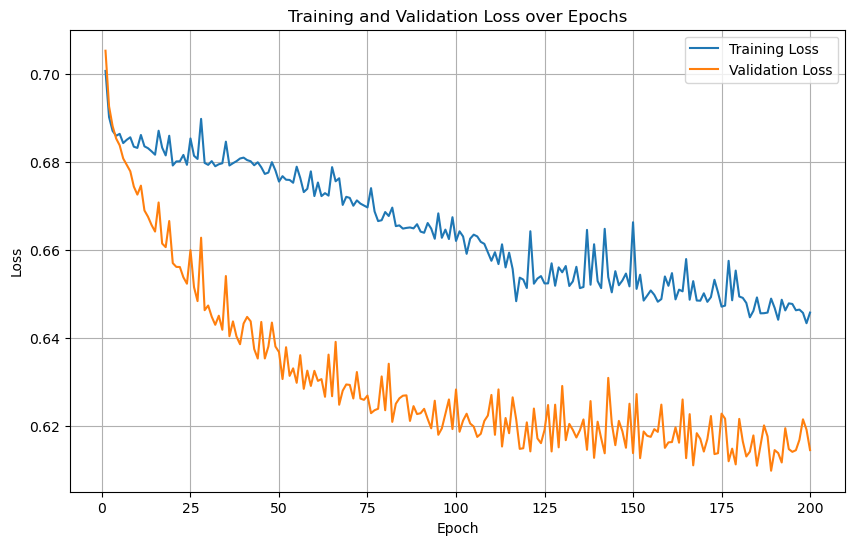

In [8]:
# Train with NN
criterion = nn.CrossEntropyLoss()
input_size = X.shape[1]
nn_model = MultiClassNN(input_size,
                        layer_sizes=[512, 256, 128, 64, 32, 16],
                        num_classes=2)
nn_model, train_losses, val_losses = split_and_train(X, y,
                                                     nn_model, NUM_EPOCHS,
                                                     criterion, lr=0.00001)
plot_losses(train_losses, val_losses)

In [9]:
get_model_summary(nn_model, input_shape=X.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MultiClassNN                             [891, 2]                  --
├─Sequential: 1-1                        [891, 2]                  --
│    └─Linear: 2-1                       [891, 512]                7,168
│    └─ReLU: 2-2                         [891, 512]                --
│    └─Linear: 2-3                       [891, 256]                131,328
│    └─ReLU: 2-4                         [891, 256]                --
│    └─Linear: 2-5                       [891, 128]                32,896
│    └─ReLU: 2-6                         [891, 128]                --
│    └─Linear: 2-7                       [891, 64]                 8,256
│    └─ReLU: 2-8                         [891, 64]                 --
│    └─Linear: 2-9                       [891, 32]                 2,080
│    └─ReLU: 2-10                        [891, 32]                 --
│    └─Linear: 2-11                      [891, 16]                 

In [10]:
testing_df = preprocess_data(TESTING_CSV_PATH,
                             FEATURE_CONFIG_PATH,
                             EXCLUDED_FIELDS + [LABEL_COLUMN]).astype(np.float32)
submission = predict_test_data(nn_model, testing_df, ID_COLUMN, LABEL_COLUMN)
submission.to_csv('titanic/titanic_predictions.csv', index=False)

ValueError: Data must be 1-dimensional, got ndarray of shape (418, 2) instead